In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Dense, GlobalAveragePooling2D
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load CIFAR-10 dataset
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Neural networks work better with smaller values (avoiding large weight updates).
# Prevents numerical instability in training.
# Helps in faster convergence.

In [ ]:
# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# One-hot encoding converts the 10 labels of cifar10 dataset into a binary vector of size 10 where only one position is 1, and the rest are 0.
# In classification tasks, softmax activation in the last layer expects a one-hot encoded label.
# It allows the model to compute categorical cross-entropy loss, which is used to measure how well the predicted probabilities match the true labels.

In [ ]:
# Define the CNN model
model = Sequential([
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32,32,3)), # 64 filters, 3,3 filter size-  Extracts low-level features like edges, textures, and colors.
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)), # we add a second convolution before pooling which helps the network extract more meaningful features before reducing spatial size.
                         # if we add max pooling directly after first convolutional layer, too much info would be lost.
                         # Also, adding 2 convolutional layers one after the other adds more non linearity due to multiple relu activations which improves learning without adding many parameters
    Dropout(0.3),

    Conv2D(128, (3,3), activation='relu', padding='same'), # The deeper layers focus on more abstract features like shapes, textures, and object parts.
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu', padding='same'), # relu activation is used because:
                                                           # Non-linearity: ReLU introduces non-linearity, allowing the network to learn complex patterns.
                                                           # Avoids Vanishing Gradient: Helps prevent the vanishing gradient problem, allowing better gradient flow during training.
                                                           # Sparse Activation: Only positive values are activated, improving efficiency and generalization.
                                                           # Computational Efficiency: Simple and fast to compute (just thresholding).
                                                           # Improves Performance: Leads to faster training and higher accuracy in CNNs.

    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.4),



    layers.Conv2D(256, (3, 3), activation='relu', padding='same'), # Uses 256 filters to capture even higher-level features such as object parts and structures.
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),

    layers.GlobalAveragePooling2D(), # A better alternative to 'flatten()'.converts 2D features to 1D vector while capturing more information than flatten
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax') # Softmax activation function is used because:
                                    # Probability Distribution: Converts logits into probabilities that sum to 1, making predictions interpretable.
                                    # Multi-Class Classification: Ideal for selecting one class out of many in multi-class problems.
                                    # Amplifies Largest Output: Emphasizes the class with the highest score, aiding clear decision-making.
                                    # Differentiable: Enables backpropagation for model training.
                                    # Works with Cross-Entropy Loss: Compatible with cross-entropy loss for efficient training in classification tasks.
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,217,354 (4.64 MB)

 Trainable params: 1,215,562 (4.64 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [ ]:
# Compile model
model.compile(optimizer=keras.optimizers.AdamW(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Learning rate scheduler
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-6)

In [ ]:
# Train model
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test),
                    callbacks=[lr_scheduler])

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.8142 - loss: 0.5411 - val_accuracy: 0.8034 - val_loss: 0.5862 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.8338 - loss: 0.4873 - val_accuracy: 0.8280 - val_loss: 0.5163 - learning_rate: 0.0010
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.8426 - loss: 0.4589 - val_accuracy: 0.8211 - val_loss: 0.5392 - learning_rate: 0.0010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.8564 - loss: 0.4234 - val_accuracy: 0.8235 - val_loss: 0.5428 - learning_rate: 0.0010
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.8650 - loss: 0.3952 - val_accuracy: 0.8390 - val_loss: 0.4773 - learning_rate: 0.0010
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.8771 - loss: 0.3601 - val_accuracy: 0.8407 - val_loss: 0.4869 - learning_rate: 0.0010
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.8804 - l

In [ ]:
# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9039 - loss: 0.4379
Test accuracy: 0.9002


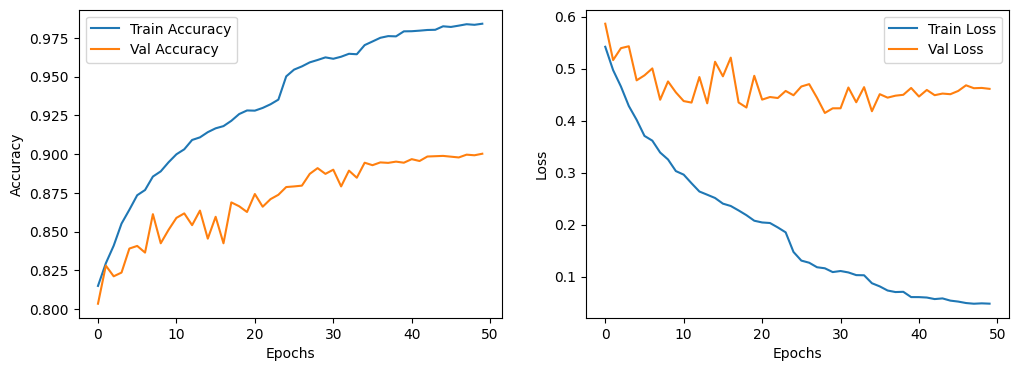

In [ ]:
def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_history(history)